<a href="https://colab.research.google.com/github/starrylight90/Credit-Card-Fraud-Detection-using-Logistic-Regression/blob/main/ML_MAJOR_JANUARY_(ML_01_MLB4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Import Important Libraries and Dataset**

In [ ]:
# import necessary python libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# read the csv file for dataset
df = pd.read_csv('fraudTest.csv')

In [ ]:
# display the dataset
df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2.291164e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497.0,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1.371817e+09,33.986391,-81.200714,0.0
1,1,2020-06-21 12:14:33,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302.0,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1.371817e+09,39.450498,-109.960431,0.0
2,2,2020-06-21 12:14:53,3.598215e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496.0,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1.371817e+09,40.495810,-74.196111,0.0
3,3,2020-06-21 12:15:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767.0,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1.371817e+09,28.812398,-80.883061,0.0
4,4,2020-06-21 12:15:17,3.526826e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126.0,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1.371817e+09,44.959148,-85.884734,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31119,31119,2020-07-01 15:44:54,4.698164e+15,fraud_Simonis-Prohaska,misc_pos,1.78,Sharon,Powell,F,101 Carla Loop,...,40.3406,-120.2824,104.0,"Teacher, adult education",1989-08-16,aa15e27a42e26a5e1e1d3a8642faabdb,1.372693e+09,41.106660,-121.106664,0.0
31120,31120,2020-07-01 15:45:01,3.553629e+15,fraud_Cummerata-Hilpert,entertainment,36.63,Sharon,Johnson,F,7202 Jeffrey Mills,...,48.3400,-122.3456,85.0,"Research officer, political party",1984-09-01,e378eb98efb5ef9c5129d34f448a6110,1.372694e+09,48.449360,-122.128530,0.0
31121,31121,2020-07-01 15:46:07,4.906629e+18,fraud_Friesen Inc,shopping_pos,9.20,Charles,Moreno,M,838 Franklin Prairie Apt. 902,...,24.6557,-81.3824,32891.0,Town planner,1987-02-13,8be3510c86d2637ee915c641fd2cda62,1.372694e+09,24.880999,-80.524712,0.0
31122,31122,2020-07-01 15:46:50,1.800115e+14,"fraud_Feil, Hilpert and Koss",food_dining,71.46,Craig,Dunn,M,721 Jacqueline Brooks,...,41.2153,-90.9879,1504.0,Manufacturing engineer,1993-10-05,af0cd057be001c6669e9712853e64e77,1.372694e+09,40.475453,-90.658514,0.0


## **Exploratory Data Analysis**

### **Understanding the Dataset**

In [ ]:
#check the dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31124 entries, 0 to 31123
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             31124 non-null  int64  
 1   trans_date_trans_time  31124 non-null  object 
 2   cc_num                 31123 non-null  float64
 3   merchant               31123 non-null  object 
 4   category               31123 non-null  object 
 5   amt                    31123 non-null  float64
 6   first                  31123 non-null  object 
 7   last                   31123 non-null  object 
 8   gender                 31123 non-null  object 
 9   street                 31123 non-null  object 
 10  city                   31123 non-null  object 
 11  state                  31123 non-null  object 
 12  zip                    31123 non-null  float64
 13  lat                    31123 non-null  float64
 14  long                   31123 non-null  float64
 15  ci

In [ ]:
#statistical summary of df
df.describe().round()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,31124.0,3.112300e+04,31123.0,31123.0,31123.0,31123.0,31123.0,3.112300e+04,31123.0,31123.0,31123.0
mean,15562.0,4.091678e+17,69.0,48551.0,39.0,-90.0,90132.0,1.372249e+09,39.0,-90.0,0.0
std,8985.0,1.297193e+18,133.0,26775.0,5.0,14.0,304341.0,2.675250e+05,5.0,14.0,0.0
min,0.0,6.041621e+10,1.0,1257.0,20.0,-166.0,23.0,1.371817e+09,19.0,-167.0,0.0
25%,7781.0,1.800429e+14,10.0,25832.0,35.0,-97.0,759.0,1.371992e+09,35.0,-97.0,0.0
50%,15562.0,3.518669e+15,47.0,48088.0,39.0,-87.0,2457.0,1.372270e+09,39.0,-87.0,0.0
75%,23342.0,4.610065e+15,83.0,71960.0,42.0,-80.0,20478.0,1.372497e+09,42.0,-80.0,0.0
max,31123.0,4.992346e+18,6600.0,99783.0,66.0,-68.0,2906700.0,1.372694e+09,67.0,-67.0,1.0


In [ ]:
#checking null values
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   1
merchant                 1
category                 1
amt                      1
first                    1
last                     1
gender                   1
street                   1
city                     1
state                    1
zip                      1
lat                      1
long                     1
city_pop                 1
job                      1
dob                      1
trans_num                1
unix_time                1
merch_lat                1
merch_long               1
is_fraud                 1
dtype: int64

In [ ]:
df.head(2)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2.291164e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497.0,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1.371817e+09,33.986391,-81.200714,0.0
1,1,2020-06-21 12:14:33,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302.0,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1.371817e+09,39.450498,-109.960431,0.0


In [ ]:
df.tail(2)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
31122,31122,2020-07-01 15:46:50,1.800115e+14,"fraud_Feil, Hilpert and Koss",food_dining,71.46,Craig,Dunn,M,721 Jacqueline Brooks,...,41.2153,-90.9879,1504.0,Manufacturing engineer,1993-10-05,af0cd057be001c6669e9712853e64e77,1.372694e+09,40.475453,-90.658514,0.0
31123,31123,2020-07-01 15:4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### **Plotting The Graphs**

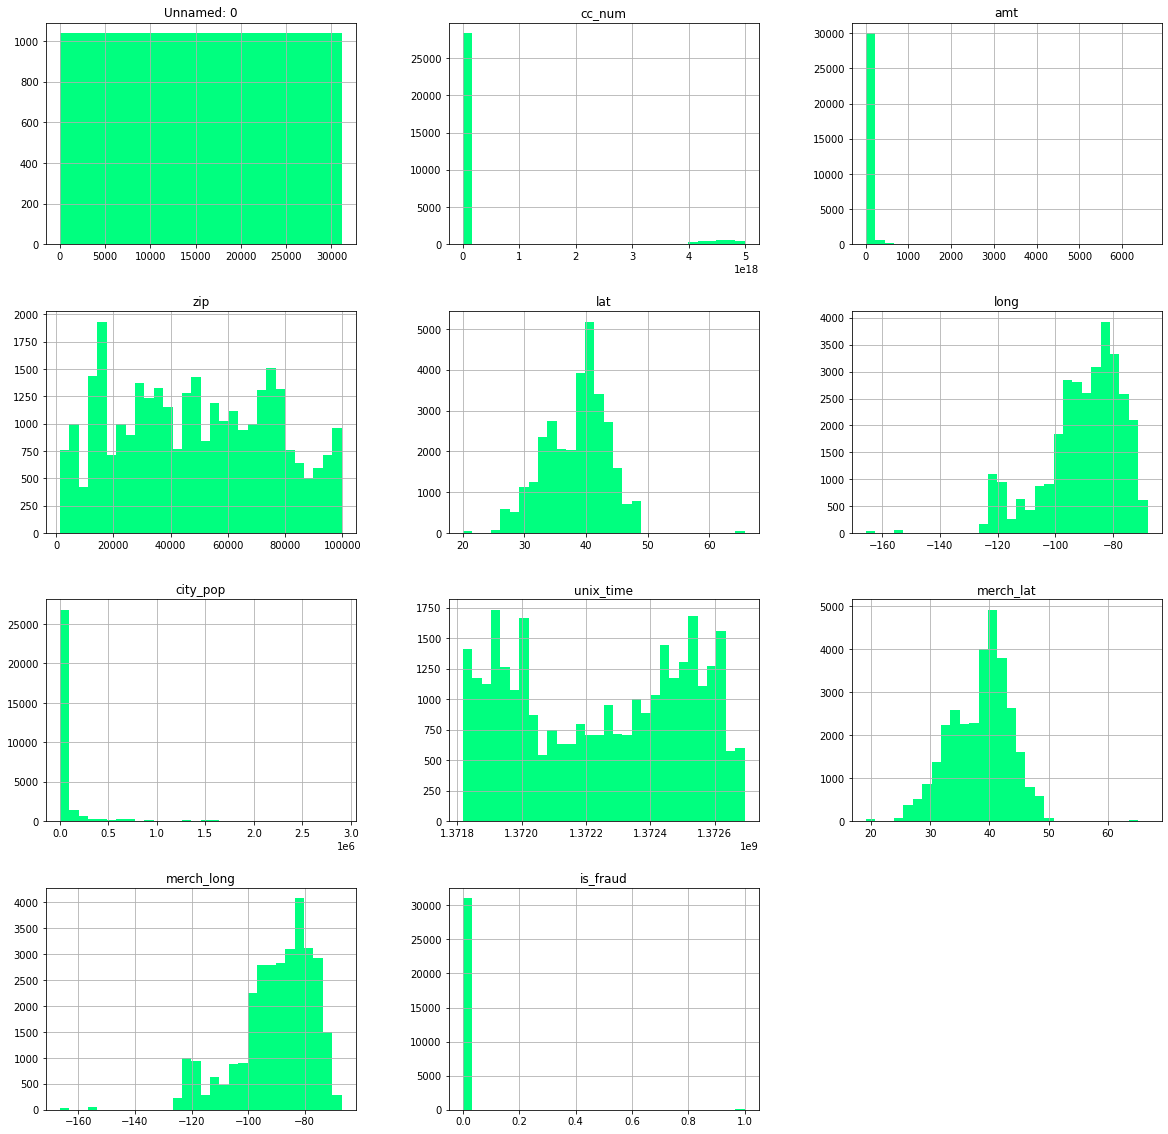

In [ ]:
# Plot the histogram
df.hist(bins = 30, figsize = (20, 20), color = 'springgreen');

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


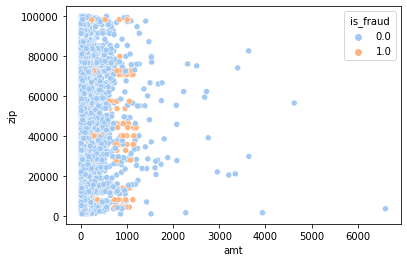

In [ ]:
sns.scatterplot(df["amt"], df["zip"], hue=df["is_fraud"],palette = "pastel")
plt.show()

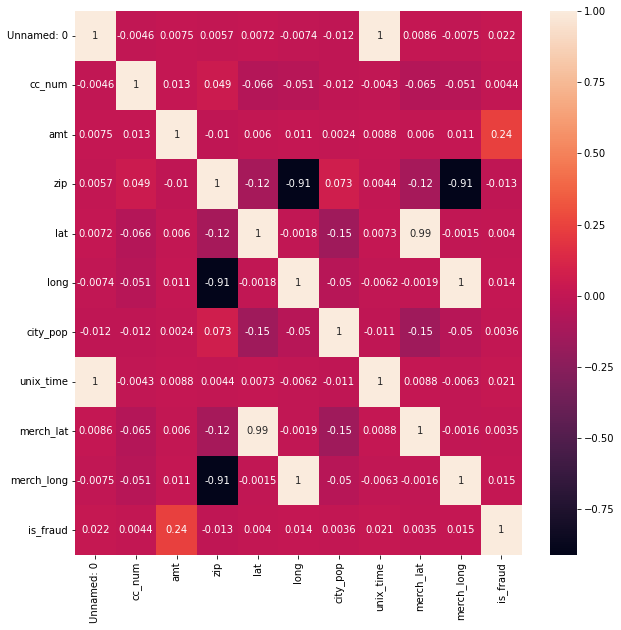

In [ ]:
# Plot the correlation matrix

plt.figure(figsize = (10,10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot = True)
plt.show()

<AxesSubplot:ylabel='amt'>

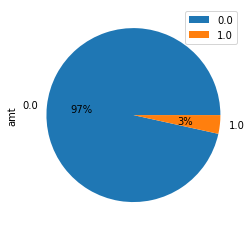

In [ ]:
#pie plot
df.groupby(['is_fraud']).sum().plot(kind='pie', y='amt', autopct='%1.0f%%')

## **NULL Value Rectification**

### **Finding NULL Values**

In [ ]:
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   1
merchant                 1
category                 1
amt                      1
first                    1
last                     1
gender                   1
street                   1
city                     1
state                    1
zip                      1
lat                      1
long                     1
city_pop                 1
job                      1
dob                      1
trans_num                1
unix_time                1
merch_lat                1
merch_long               1
is_fraud                 1
dtype: int64

### **Removing Object Data**

In [ ]:
#removing objects and keeping numeric data
df2 = df.drop(columns = ['trans_date_trans_time','merchant','category','first',
                         'last','gender','street','city','state','job','dob','trans_num'])

In [ ]:
df2.shape


(31124, 11)

In [ ]:
df.shape

(31124, 23)

In [ ]:
df2.isnull().sum()

Unnamed: 0    0
cc_num        1
amt           1
zip           1
lat           1
long          1
city_pop      1
unix_time     1
merch_lat     1
merch_long    1
is_fraud      1
dtype: int64

### **Dataset after removing the object**

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31124 entries, 0 to 31123
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  31124 non-null  int64  
 1   cc_num      31123 non-null  float64
 2   amt         31123 non-null  float64
 3   zip         31123 non-null  float64
 4   lat         31123 non-null  float64
 5   long        31123 non-null  float64
 6   city_pop    31123 non-null  float64
 7   unix_time   31123 non-null  float64
 8   merch_lat   31123 non-null  float64
 9   merch_long  31123 non-null  float64
 10  is_fraud    31123 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 2.6 MB


### **Filling the Dataset null values with weighted means**

In [ ]:
df2['cc_num'].fillna(int(df2['cc_num'].mean()), inplace=True)
df2['amt'].fillna(int(df2['amt'].mean()), inplace=True)
df2['zip'].fillna(int(df2['zip'].mean()), inplace=True)
df2['lat'].fillna(int(df2['lat'].mean()), inplace=True)
df2['long'].fillna(int(df2['long'].mean()), inplace=True)
df2['city_pop'].fillna(int(df2['city_pop'].mean()), inplace=True)
df2['unix_time'].fillna(int(df2['unix_time'].mean()), inplace=True)
df2['merch_lat'].fillna(int(df2['merch_lat'].mean()), inplace=True)
df2['merch_long'].fillna(int(df2['merch_long'].mean()), inplace=True)
df2['is_fraud'].fillna(int(df2['is_fraud'].mean()), inplace=True)

In [ ]:
df2.isnull().sum()

Unnamed: 0    0
cc_num        0
amt           0
zip           0
lat           0
long          0
city_pop      0
unix_time     0
merch_lat     0
merch_long    0
is_fraud      0
dtype: int64

In [ ]:
df2

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
0,0,2.291164e+15,2.86,29209.0,33.9659,-80.9355,333497.0,1.371817e+09,33.986391,-81.200714,0.0
1,1,3.573030e+15,29.84,84002.0,40.3207,-110.4360,302.0,1.371817e+09,39.450498,-109.960431,0.0
2,2,3.598215e+15,41.28,11710.0,40.6729,-73.5365,34496.0,1.371817e+09,40.495810,-74.196111,0.0
3,3,3.591920e+15,60.05,32780.0,28.5697,-80.8191,54767.0,1.371817e+09,28.812398,-80.883061,0.0
4,4,3.526826e+15,3.19,49632.0,44.2529,-85.0170,1126.0,1.371817e+09,44.959148,-85.884734,0.0
...,...,...,...,...,...,...,...,...,...,...,...
31119,31119,4.698164e+15,1.78,96136.0,40.3406,-120.2824,104.0,1.372693e+09,41.106660,-121.106664,0.0
31120,31120,3.553629e+15,36.63,98238.0,48.3400,-122.3456,85.0,1.372694e+09,48.449360,-122.128530,0.0
31121,31121,4.906629e+18,9.20,33040.0,24.6557,-81.3824,32891.0,1.372694e+09,24.880999,-80.524712,0.0
31122,31122,1.800115e+14,71.46,61272.0,41.2153,-90.9879,1504.0,1.372694e+09,40.475453,-90.658514,0.0


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31124 entries, 0 to 31123
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  31124 non-null  int64  
 1   cc_num      31124 non-null  float64
 2   amt         31124 non-null  float64
 3   zip         31124 non-null  float64
 4   lat         31124 non-null  float64
 5   long        31124 non-null  float64
 6   city_pop    31124 non-null  float64
 7   unix_time   31124 non-null  float64
 8   merch_lat   31124 non-null  float64
 9   merch_long  31124 non-null  float64
 10  is_fraud    31124 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 2.6 MB


## **Building a model**

### **Creating Training and Testing Dataset**

In [ ]:
# Create train and test data

X = df2.drop(columns = ['is_fraud'])
y = df2[['is_fraud']]

In [ ]:
X

In [ ]:
y

,is_fraud
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
31119,0.0
31120,0.0
31121,0.0
31122,0.0


In [ ]:
X.shape

(31124, 10)

In [ ]:
y.shape

(31124, 1)

In [ ]:
df2.isnull().sum()

Unnamed: 0    0
cc_num        0
amt           0
zip           0
lat           0
long          0
city_pop      0
unix_time     0
merch_lat     0
merch_long    0
is_fraud      0
dtype: int64

### **Displaying the Fraud v/s Not Fraud Data**

In [ ]:
print ('Not Fraud % ',round(df['is_fraud'].value_counts()[0]/len(df)*100,2))
print ()
print (round(df.amt[df.is_fraud == 0].describe(),2))
print ()
print ()
print ('Fraud %    ',round(df['is_fraud'].value_counts()[1]/len(df)*100,2))
print ()
print (round(df.amt[df.is_fraud == 1].describe(),2))

Not Fraud %  99.56

count    30988.00
mean        67.08
std        126.75
min          1.00
25%          9.56
50%         46.42
75%         82.44
max       6600.44
Name: amt, dtype: float64


Fraud %     0.43

count     135.00
mean      551.92
std       389.42
min         4.64
25%       277.04
50%       520.02
75%       909.70
max      1197.26
Name: amt, dtype: float64


Non Fraud %  99.56
Fraud %     0.43


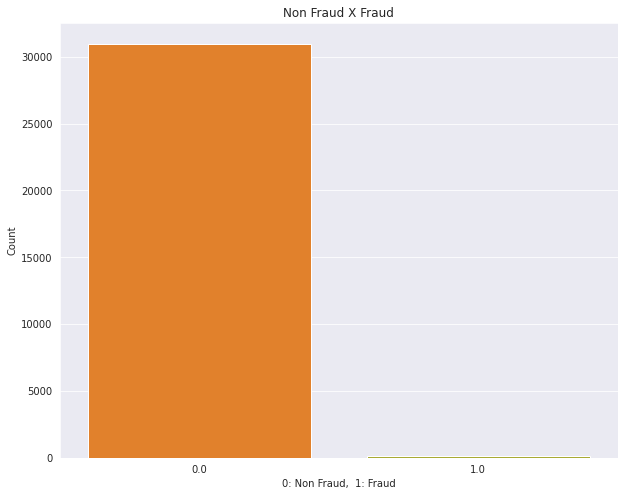

In [ ]:
plt.figure(figsize=(10,8))
sns.set_style('darkgrid')
sns.barplot(x=df['is_fraud'].value_counts().index,y=df['is_fraud'].value_counts(), palette=["C1", "C8"])
plt.title('Non Fraud X Fraud')
plt.ylabel('Count')
plt.xlabel('0: Non Fraud,  1: Fraud')
print ('Non Fraud % ',round(df['is_fraud'].value_counts()[0]/len(df)*100,2))
print ('Fraud %    ',round(df['is_fraud'].value_counts()[1]/len(df)*100,2));

### **Applying Logistic Regression**

In [ ]:
feature_names = df2.iloc[:, 1:10].columns
target = df2.iloc[:1, 10:].columns

data_features = df2[feature_names]
data_target = df2[target]

In [ ]:
feature_names

Index(['cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time',
       'merch_lat', 'merch_long'],
      dtype='object')

In [ ]:
target

Index(['is_fraud'], dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
np.random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(data_features, data_target, 
                                                    train_size = 0.80, test_size = 0.20, random_state = 1)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [ ]:
lr.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## **Checking the Accuracy**

In [ ]:
def PrintStats(cmat, y_test, pred):
    tpos = cmat[0][0]
    fneg = cmat[1][1]
    fpos = cmat[0][1]
    tneg = cmat[1][0]

In [ ]:
def RunModel(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train.values.ravel())
    pred = model.predict(X_test)
    matrix = confusion_matrix(y_test, pred)
    return matrix, pred

In [ ]:
!pip install scikit-plot
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import scikitplot as skplt

In [ ]:
cmat, pred = RunModel(lr, X_train, y_train, X_test, y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### **Confusion Matrix**

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

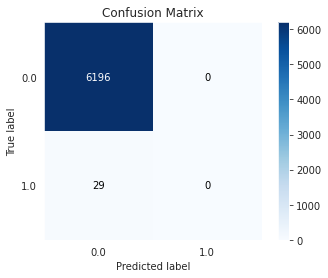

In [ ]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, pred)

### **Accuracy Score**

In [ ]:
accuracy_score(y_test, pred)

0.9953413654618474

### **Classification Report**

In [ ]:
print (classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6196
         1.0       0.00      0.00      0.00        29

    accuracy                           1.00      6225
   macro avg       0.50      0.50      0.50      6225
weighted avg       0.99      1.00      0.99      6225



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
